In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

from plot_utils import plot_temperature_ensemble, plot_emission_ensemble

## 1. Load data

In [2]:
results_path = "/home/obola/repositories/cicero-scm-surrogate/data/20250926_110035/raw/results.pkl"
scenario_path = "/home/obola/repositories/cicero-scm-surrogate/data/20250926_110035/raw/scenarios.pkl"

results = pickle.load(open(results_path, "rb"))
scenarios = pickle.load(open(scenario_path, "rb"))
baseline_result = pd.read_csv("baseline_result_v2.csv", index_col="Unnamed: 0")

## 2. Plot the temperature curves

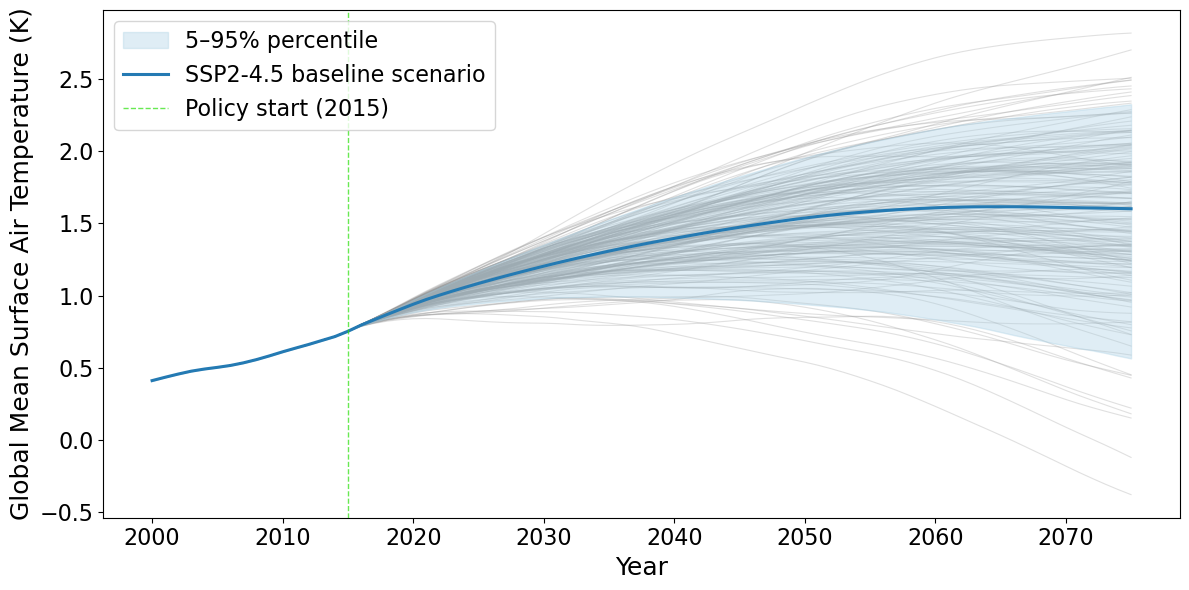

In [3]:
plot_temperature_ensemble(results, baseline_result, start_year=2000, n_sample=200, save_name="temperature_ensemble_new.pdf", random_seed=0)

## 3. Plot the emission policies

In [79]:
import sys
import os
sys.path.insert(0,os.path.join(os.getcwd(), '../ciceroscm/', 'src'))

from ciceroscm import CICEROSCM
from ciceroscm.parallel.cscmparwrapper import run_ciceroscm_parallel
import ciceroscm.input_handler as input_handler

test_data_dir = "/home/obola/repositories/cicero-scm-surrogate/ciceroscm/tests/test-data"
em_data_start = 1900
em_data_policy = 2015
em_data_end = 2075

ih = input_handler.InputHandler({"nyend": em_data_end, "nystart": em_data_start, "emstart": em_data_policy})
em_data = ih.read_emissions(os.path.join(test_data_dir, "ssp245_em_RCMIP.txt"))

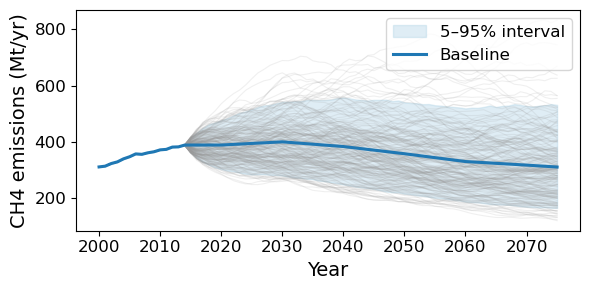

In [81]:
plot_emission_ensemble(em_data, scenarios, gas="CH4", n_sample=200, save_name="CH4_ensemble_new.pdf")

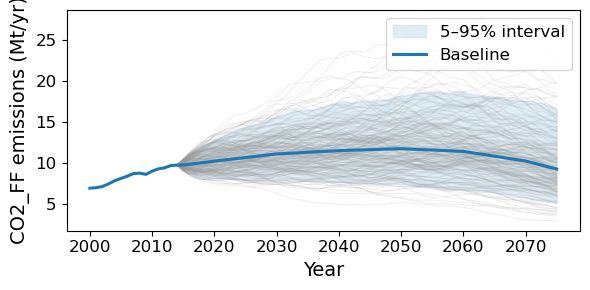

In [82]:
plot_emission_ensemble(em_data, scenarios, gas="CO2_FF", n_sample=200, save_name="CO2_FF_ensemble_new.pdf")

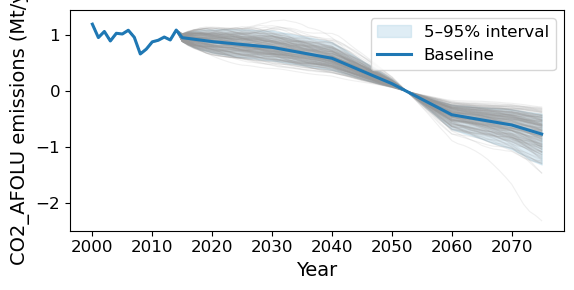

In [83]:
plot_emission_ensemble(em_data, scenarios, gas="CO2_AFOLU", n_sample=200, save_name="CO2_AFOLU_ensemble_new.pdf")

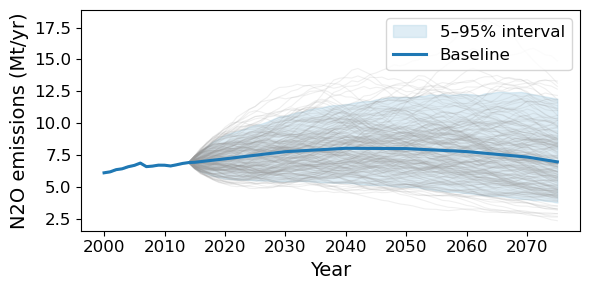

In [84]:
plot_emission_ensemble(em_data, scenarios, gas="N2O", n_sample=200, save_name="N2O_ensemble_new.pdf")

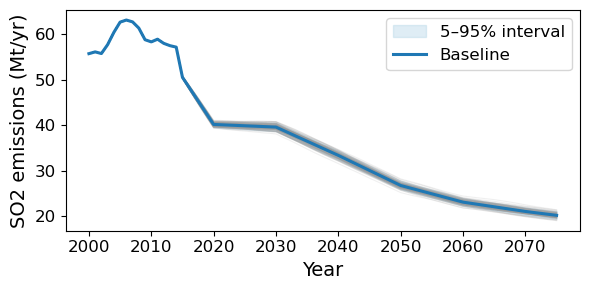

In [85]:
plot_emission_ensemble(em_data, scenarios, gas="SO2", n_sample=100, save_name="SO2_ensemble_new.pdf")

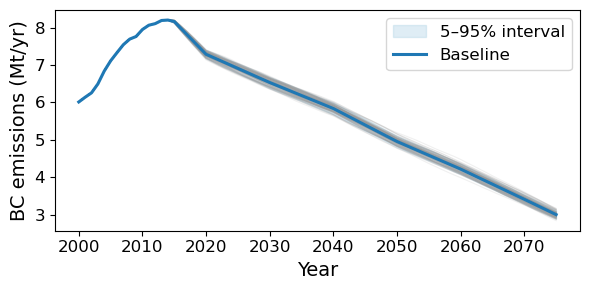

In [72]:
plot_emission_ensemble(em_data, scenarios, gas="BC",    n_sample=100, save_name="BC_ensemble_new.pdf")

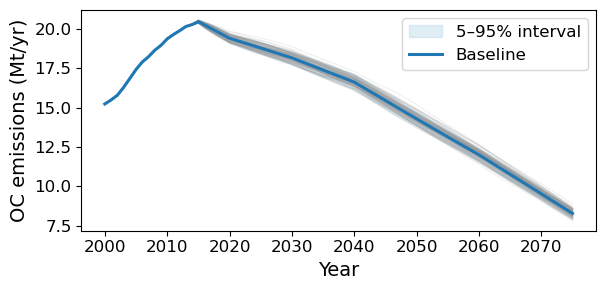

In [73]:
plot_emission_ensemble(em_data, scenarios, gas="OC",    n_sample=100, save_name="OC_ensemble_new.pdf")

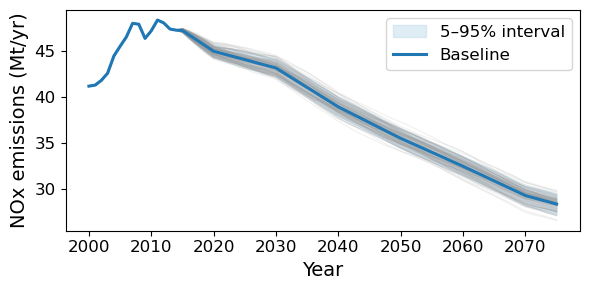

In [74]:
plot_emission_ensemble(em_data, scenarios, gas="NOx",   n_sample=100, save_name="NOx_ensemble_new.pdf")


## 4. Surrogate model training data format

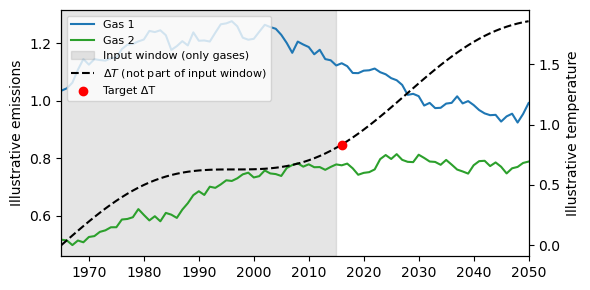

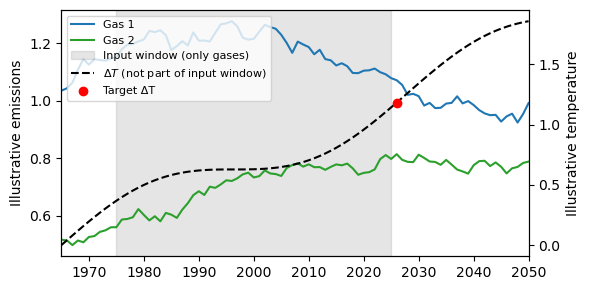

In [ ]:
# Function to plot schematic with clean style and updated legend
def plot_schematic(end_year, save_path):
    np.random.seed(0)
    years = np.arange(1965, 2051)
    n_years = len(years)
    
    # Simulated gas data
    gas1 = np.cumsum(np.random.randn(n_years)) * 0.02 + 1.0
    gas2 = np.cumsum(np.random.randn(n_years)) * 0.015 + 0.5
    temp = 0.02 * (years - 1965) + np.sin(0.1 * (years - 1965)) * 0.2  # base-like temperature
    
    start_window = end_year - 50
    mask_window = (years >= start_window) & (years <= end_year)
    
    fig, ax1 = plt.subplots(figsize=(6, 3))
    
    # Plot gases
    ax1.plot(years, gas1, label="Gas 1", color="tab:blue")
    ax1.plot(years, gas2, label="Gas 2", color="tab:green")
    
    # Highlight window
    ax1.axvspan(start_window, end_year, color="gray", alpha=0.2, label="Input window (only gases)")
    ax1.set_ylabel("Illustrative emissions")
    
    # Plot temperature on secondary axis
    ax2 = ax1.twinx()
    ax2.plot(years, temp, "--", color="black", label=r"$\Delta T$ (not part of input window)")
    ax2.set_ylabel("Illustrative temperature")
    
    # Mark target year
    target_year = end_year + 1
    target_temp = temp[years == target_year][0]
    ax2.scatter(target_year, target_temp, color="red", zorder=5, label="Target ΔT")
    
    # Legend combining both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left", fontsize=8)
    
    ax1.set_xlim(1965, 2050)
    plt.tight_layout()
    
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

# Save updated versions
plot_schematic(2015, "plots/schematic_window_2015.pdf")
plot_schematic(2025, "plots/schematic_window_2025.pdf")